In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img_paths = ["data/c02_s07.png", "data/c06_s01.png", "data/c15_s02.png",
            "data/c10_s07.png", "data/c10_s06.png", "data/c15_s06.png"]

In [3]:
imgs = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in img_paths]

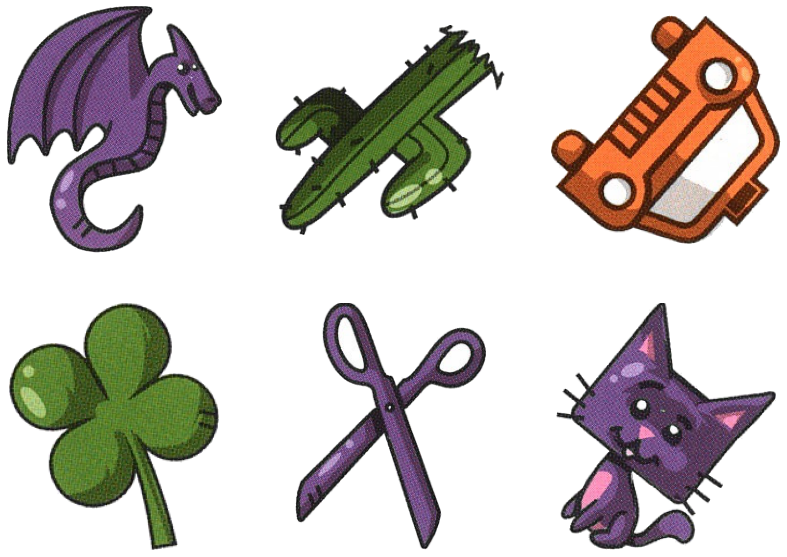

In [4]:
fig, ax_arr = plt.subplots(figsize=(14,10),nrows=2, ncols=3)

for img, ax in zip(imgs, np.nditer(ax_arr, flags=["refs_ok"])):
    ax.item().imshow(img)
    ax.item().set_axis_off()

In [5]:
imgs_gray = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in imgs]

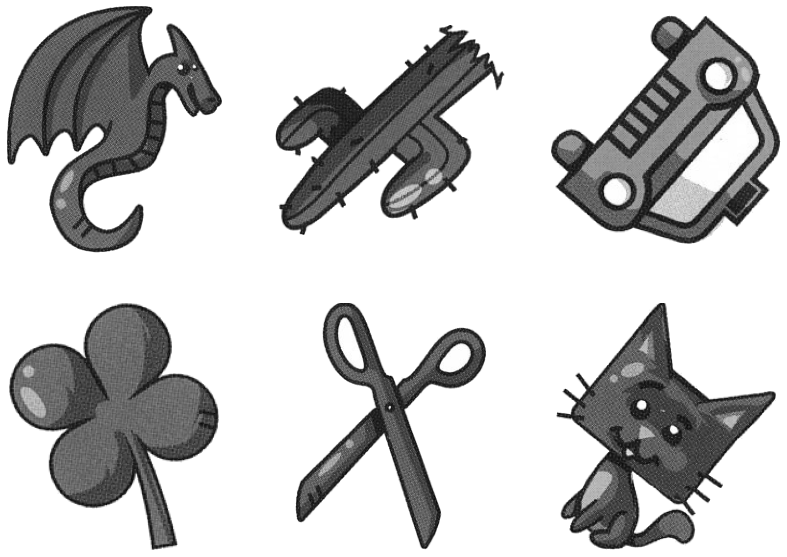

In [6]:
fig, ax_arr = plt.subplots(figsize=(14,10),nrows=2, ncols=3)

for img, ax in zip(imgs_gray, np.nditer(ax_arr, flags=["refs_ok"])):
    ax.item().imshow(img, cmap='gray')
    ax.item().set_axis_off()

In [7]:
ffts_gray = [np.fft.fftshift(np.fft.fft2(img_gray)) for img_gray in imgs_gray]

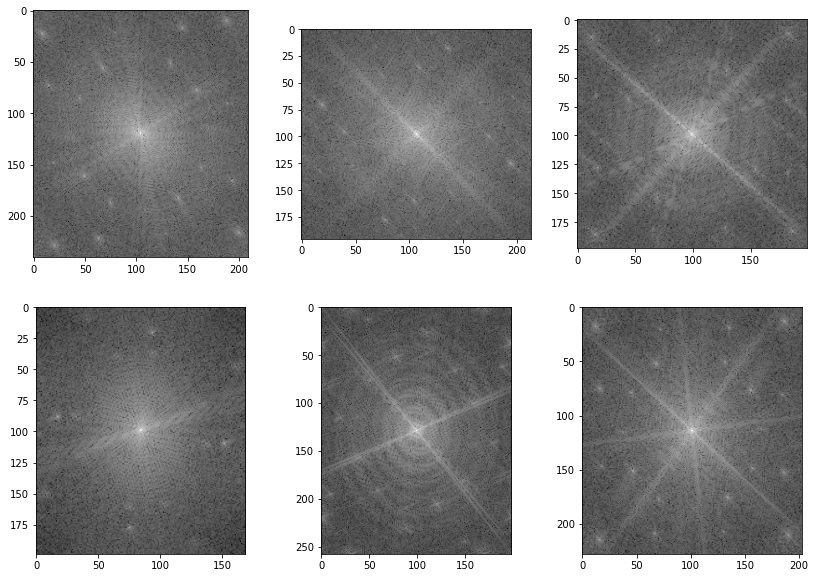

In [8]:
fig, ax_arr = plt.subplots(figsize=(14,10),nrows=2, ncols=3)

for fft, ax_ref in zip(ffts_gray, np.nditer(ax_arr, flags=["refs_ok"])):
    ax = ax_ref.item()
    ax.imshow(np.log(np.abs(fft)), cmap='gray')

In [9]:
fft_text = np.log10(np.abs(ffts_gray[4]))

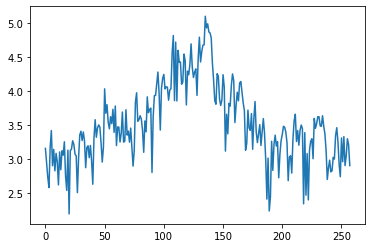

In [10]:
plt.plot(range(fft_text.shape[0]), fft_text[:,83])

In [11]:
fft = ffts_gray[0]

fft_magn = np.abs(fft)
fft_angle = np.angle(fft)

In [12]:
patch = fft_magn[20:30,50:60]
fft_magn[20:30,5:15] = patch
fft_magn[225:235,15:25] = patch
fft_magn[220:230,60:70] = patch
fft_magn[212:222,195:205] = patch
fft_magn[10:20,185:195] = patch
fft_magn[17:27,140:150] = patch
fft_magn[70:80,12:22] = patch
fft_magn[160:170,185:195] = patch
patch = patch = fft_magn[50:60,50:60]
fft_magn[52:62,65:75] = patch
fft_magn[50:60,130:140] = patch
fft_magn[79:89,39:49] = patch
fft_magn[74:84,155:165] = patch
fft_magn[185:195,69:79] = patch
fft_magn[180:190,140:150] = patch
fft_magn[160:170,45:55] = patch
fft_magn[152:162,157:167] = patch

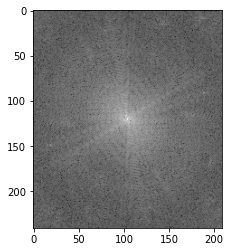

In [13]:
plt.imshow(np.log(fft_magn), cmap='gray')

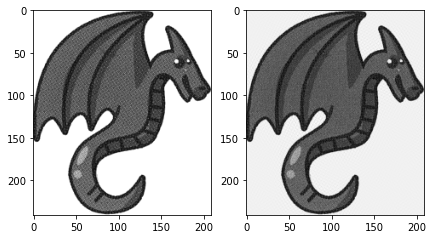

In [14]:
fig, ax_arr = plt.subplots(figsize=(7,5), ncols=2)
ax_arr[0].imshow(imgs_gray[0], cmap='gray')
ax_arr[1].imshow(np.abs(np.fft.ifft2(fft_magn * np.exp(1j*fft_angle))), cmap='gray')

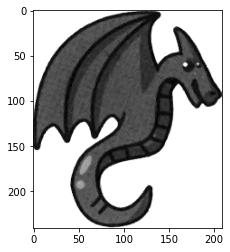

In [105]:
plt.imshow(cv2.medianBlur(imgs_gray[0], 3), cmap='gray')

In [126]:
def block_coords(shape, block_size):
    blocks = []
    i = 0

    while i < shape[0]:
        j = 0
        while j < shape[1]:
            blocks.append((i, j, *block_size))
            j += block_size[1]
        i += block_size[0]
    return blocks

In [127]:
def sub_images_from_blk_coords(orgn_img, blk_coords):
    sub_imgs = []
    shape = orgn_img.shape
    #blurred = cv2.GaussianBlur(orgn_img, (3,3) ,1)
    blurred = cv2.medianBlur(orgn_img, 3)
    for blk_coord in blk_coords:
        i, j, h, w = blk_coord
        img = np.zeros(shape, dtype=float)
        img[i:i+h, j:j+w] = orgn_img[i:i+h, j:j+w] 
        mean_img = np.zeros(shape, dtype=float)
        mean_img[i:i+h, j:j+w] = blurred[i:i+h, j:j+w]
        sub_imgs.append(img - mean_img)
    return sub_imgs

In [149]:
def mean_magn_ffts(ffts):
    result = np.abs(ffts[0])
    for fft in ffts[1:]:
        result = np.abs(fft) + result
    return result / len(ffts)

In [150]:
def shift_fft(img):
    return np.fft.fftshift(np.fft.fft2(img))

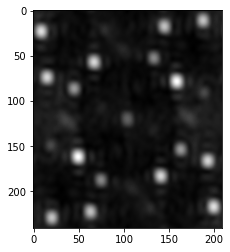

In [155]:
img_gray = imgs_gray[0]
blk_coords = block_coords(img_gray.shape, (20,20))
sub_imgs = sub_images_from_blk_coords(img_gray, blk_coords)
sub_ffts = [shift_fft(img)  for img in sub_imgs]
mean_magn = mean_magn_ffts(sub_ffts)

plt.imshow(mean_magn, cmap='gray')

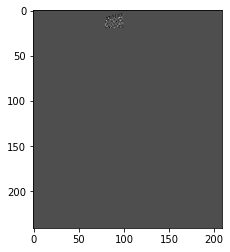

In [161]:
plt.imshow(sub_imgs[4],cmap='gray')

In [139]:
mn = np.min(mean_magn)
mx = np.max(mean_magn)
threshold = mn + (mx - mn) * 0.5
mean_magn[mean_magn < threshold] = 0

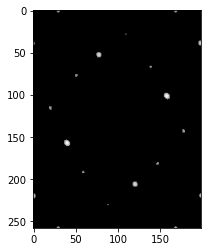

In [140]:
plt.imshow(mean_magn, cmap='gray')

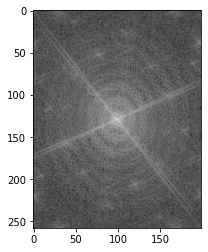

In [134]:
plt.imshow(np.log(np.abs(ffts_gray[4])), cmap='gray')

In [123]:
temp = np.fft.ifftshift(np.fft.fft2(imgs_gray[5] - cv2.medianBlur(imgs_gray[5], 3)))